### Importar las librerías a utilizar

In [2]:
import pandas as pd
#from pandas_profiling import ProfileReport   # para versiones Python < 3.11
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Leer archivo de datos

In [3]:
datos = pd.read_csv("titanic3.csv")

In [4]:
datos.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
datos.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
datos.shape

(1309, 14)

## Ejemplos de uso de Seaborn para explorar los datos

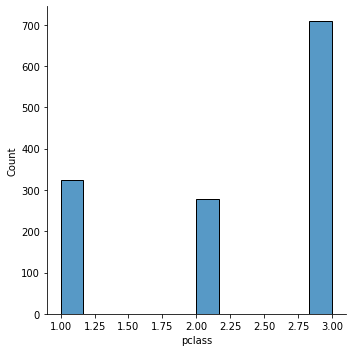

In [8]:
sns.displot(datos['pclass'])

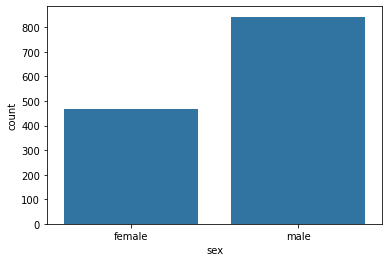

In [9]:
sns.countplot(x = 'sex', data = datos);

### Pura Magia

In [10]:
#profile = ProfileReport(datos)
#profile

Toda la información que nos da este reporte, la podemos obtener directamente con instrucciones de Pandas...obviamente, es mucho más simple dar una sola instrucción.

### Conocemos los datos y ahora qué hacer para prepararlos (limpiarlos)?

Pandas tiene todas las instrucciones para:
1.  estandarizar los nombres de las variables
2.  eliminar datos faltantes
3.  eliminar registros duplicados
4.  crear nuevas variables
5.  etc.


###  Eliminar columnas

* La columna "body" normalmente no nos será útil, eliminémosla.
* Además la columna de home.dest tampoco es útil para el análisis.

In [11]:
datos = datos.drop(columns=['body', 'home.dest'])
print(datos.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat'],
      dtype='object')


### Cambiar el tipo de algunos datos

Varias de las columnas son categóricas, habrá que codificarlas

Las columnas categóricas son las siguientes:
- ```sex```
- ```cabin```
- ```embarked```
- ```boat```

### Columnas antes de ser codificados

In [12]:
print("sex:\n",datos["sex"])
print("\nembarked:\n",datos["embarked"])
print("\nboat:\n",datos["boat"])

sex:
 0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

embarked:
 0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

boat:
 0         2
1        11
2       NaN
3       NaN
4       NaN
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: boat, Length: 1309, dtype: object


### Columnas codificadas

In [13]:
label_encoder = LabelEncoder()
datos.loc[:, "sex"] = label_encoder.fit_transform(datos["sex"])
datos.loc[:, "embarked"] = label_encoder.fit_transform(datos["embarked"])
datos.loc[:, "boat"] = label_encoder.fit_transform(datos["boat"])
print("sex:\n",datos["sex"])
print("\nembarked:\n",datos["embarked"])
print("\nboat:\n",datos["boat"])

sex:
 0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: object

embarked:
 0       2
1       2
2       2
3       2
4       2
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: embarked, Length: 1309, dtype: object

boat:
 0       11
1        2
2       27
3       27
4       27
        ..
1304    27
1305    27
1306    27
1307    27
1308    27
Name: boat, Length: 1309, dtype: object


### Estandarizar los nombres de las columnas:

In [14]:
datos.columns = datos.columns.str.replace(".", "_").str.lower().str.strip()

### Eliminar filas duplicadas

Se buscan filas duplicadas

In [15]:
if datos[datos.duplicated()].shape[0] > 0:
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")

No hay filas duplicadas


### Reemplazar valores faltantes

Se buscan los valores nulos de cada columna

In [16]:
#Buscar valores nulos de cada columna
print(datos.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       0
boat           0
dtype: int64


* La variable de ```cabin``` es ```null``` en más de **1000** filas, por lo que el hacer un tipo de reemplazo de valores puede ser engañoso. Por lo que es mejor eliminar la columna.
* ```age``` y ```fare``` se rellenaran con el método de mediana

In [17]:
#Eliminar columna cabin
datos = datos.drop(columns=['cabin'])
#rellenar age con método de media
datos['age'].fillna(datos['age'].median(), inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17228\3677003359.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['age'].fillna(datos['age'].median(), inplace=True)


### Eliminar filas con valores faltantes

In [18]:
# Guardar la cantidad de filas antes de eliminar valores faltantes
filas_antes = datos.shape[0]

# Eliminar filas con valores faltantes
datos = datos.dropna()

# Calcular la cantidad de filas eliminadas
filas_eliminadas = filas_antes - datos.shape[0]

# Imprimir el resultado
print("Se eliminaron " + str(filas_eliminadas) + " filas con valores faltantes")


Se eliminaron 1 filas con valores faltantes


### Explorar los datos numéricos

Realizar Boxplots para cada uno

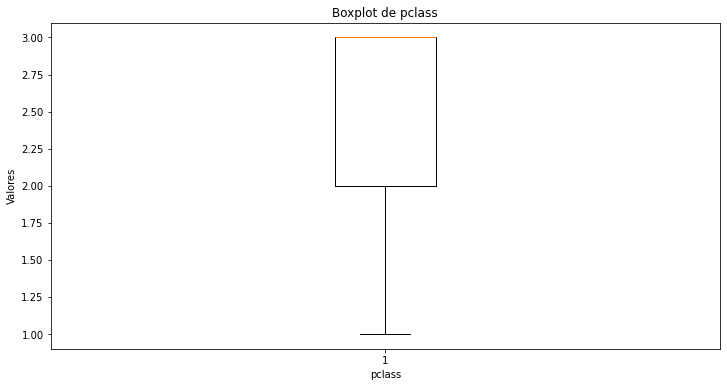

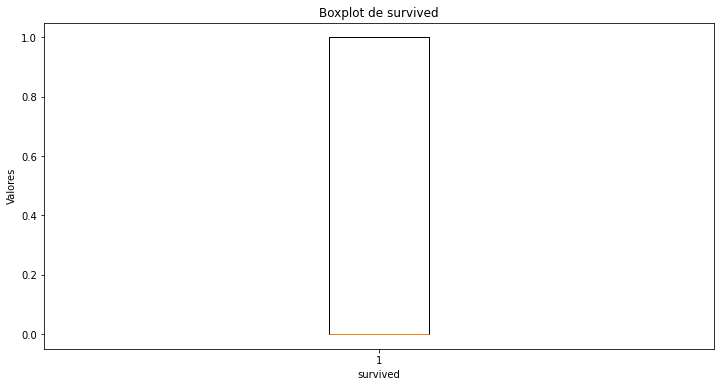

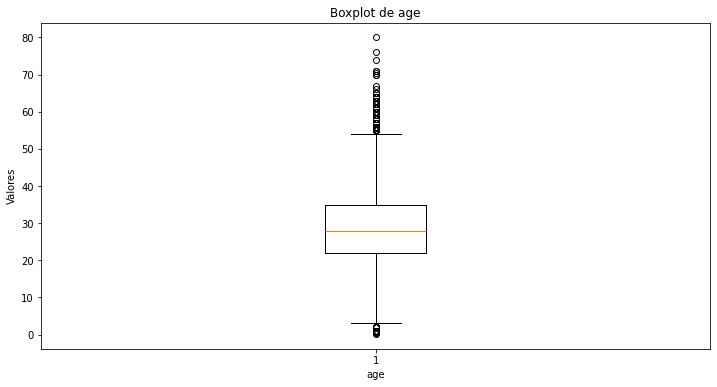

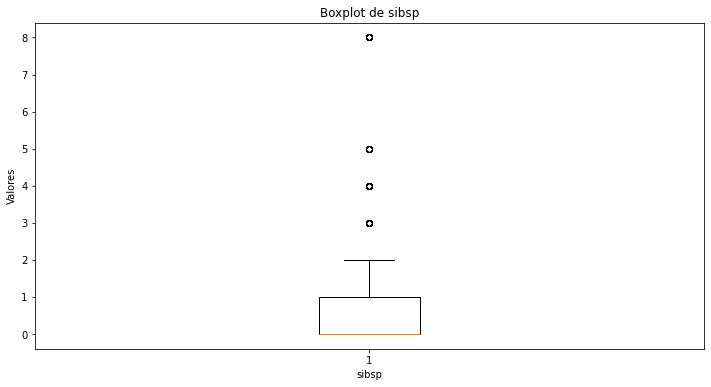

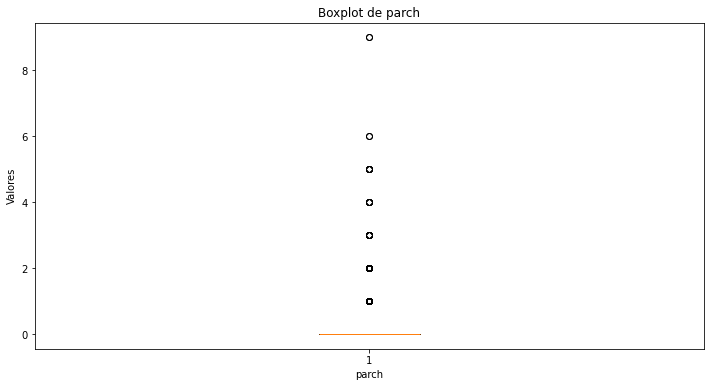

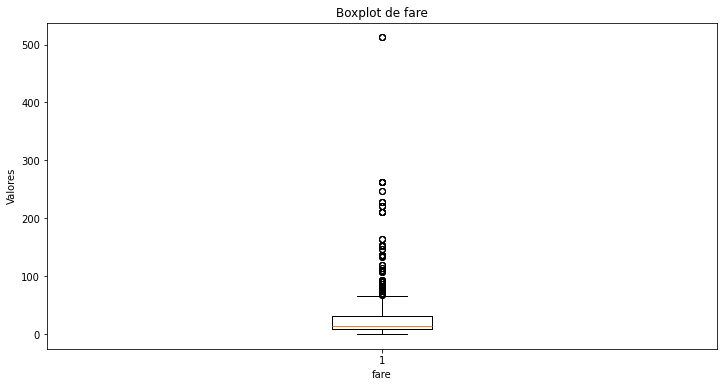

In [19]:

# Seleccionar solo las columnas numéricas
datos_numericos = datos.select_dtypes(include=["float64", "int64"])

# Crear boxplots
for columna in datos_numericos.columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot(datos_numericos[columna])  # Graficar la columna específica
    plt.title(f"Boxplot de {columna}")  # Título específico para cada variable
    plt.xlabel(columna)  # Etiqueta en el eje x
    plt.ylabel("Valores")  # Etiqueta en el eje y
    plt.show()


### Explorar los datos categóricos

Realizar gráficas de barras ej. de survived, sex

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17228\2718467348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='survived', palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17228\2718467348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos, x='sex', palette='viridis')


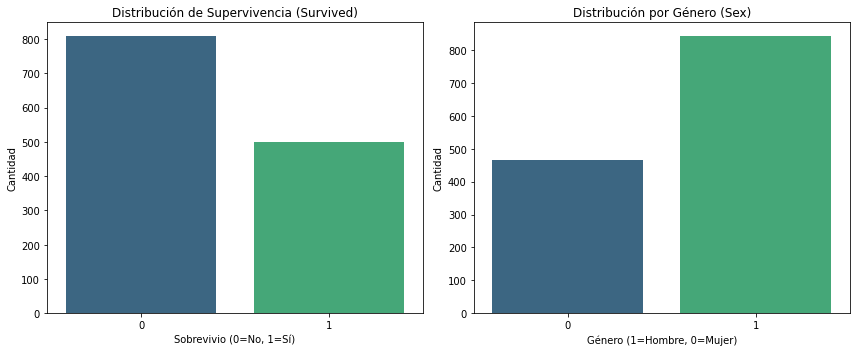

In [20]:
plt.figure(figsize=(12, 5))

# Gráfica de barras para 'survived'
plt.subplot(1, 2, 1)
sns.countplot(data=datos, x='survived', palette='viridis')
plt.title('Distribución de Supervivencia (Survived)')
plt.xlabel('Sobrevivio (0=No, 1=Sí)')
plt.ylabel('Cantidad')

# Gráfica de barras para 'sex'
plt.subplot(1, 2, 2)
sns.countplot(data=datos, x='sex', palette='viridis')
plt.title('Distribución por Género (Sex)')
plt.xlabel('Género (1=Hombre, 0=Mujer)')
plt.ylabel('Cantidad')

# Mostrar gráficas
plt.tight_layout()
plt.show()

Contrastar variables categóricas, por ej. survived vs sex con gráfica de barras apiladas (stacked)

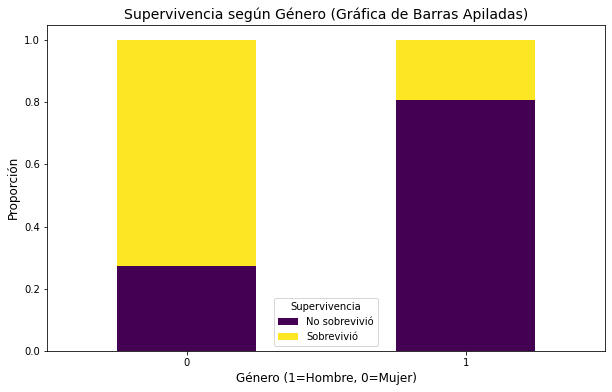

In [21]:
# Crear una tabla cruzada para 'survived' y 'sex'
crosstab_survived_sex = pd.crosstab(index=datos['sex'], columns=datos['survived'], normalize='index')

# Crear una gráfica de barras apiladas
crosstab_survived_sex.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar títulos y etiquetas
plt.title('Supervivencia según Género (Gráfica de Barras Apiladas)', fontsize=14)
plt.xlabel('Género (1=Hombre, 0=Mujer)', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])
plt.show()


### Reducir la cardinalidad

Pueden haber columas con datos categóricos demasiados variados, se podría poner un límite de frecuencia de una categoría y las que no cumplen cambiarles a un valor ötros", o algo así

In [22]:
# Definir un umbral de frecuencia mínima
umbral = 50  # Ejemplo: las categorías con menos de 50 ocurrencias serán agrupadas

# Calcular la frecuencia de cada categoría
frecuencia = datos['embarked'].value_counts()

# Identificar las categorías que cumplen con el umbral
categorias_comunes = frecuencia[frecuencia >= umbral].index

# Reemplazar las categorías raras con "Otros"
datos['embarked'] = datos['embarked'].apply(lambda x: x if x in categorias_comunes else 'Otros')

# Verificar el resultado
print(datos['embarked'].value_counts())


embarked
2        913
0        270
1        123
Otros      2
Name: count, dtype: int64


### Eliminar datos atípicos

Datos restantes después de eliminar outliers: 832 filas


(832, 11)
5     26.5500
7      0.0000
8     51.4792
15    25.9250
22    30.0000
Name: fare, dtype: float64


In [ ]:
# Gráfica de distribución de pasajeros por clase y puerto de embarque
plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='embarked', hue='pclass', palette='Set2')
plt.title('Distribución de Pasajeros por Clase y Puerto de Embarque', fontsize=14)
plt.xlabel('Puerto de Embarque (0=Cherbourg, 1=Queenstown, 2=Southampton)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Clase')
plt.show()


In [ ]:
# Gráfica de caja para comparar tarifas entre géneros
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='sex', y='fare', palette='coolwarm')
plt.title('Comparación de Tarifas por Género', fontsize=14)
plt.xlabel('Género (0=Mujer, 1=Hombre)', fontsize=12)
plt.ylabel('Tarifa (en libras pre-1970)', fontsize=12)
plt.show()


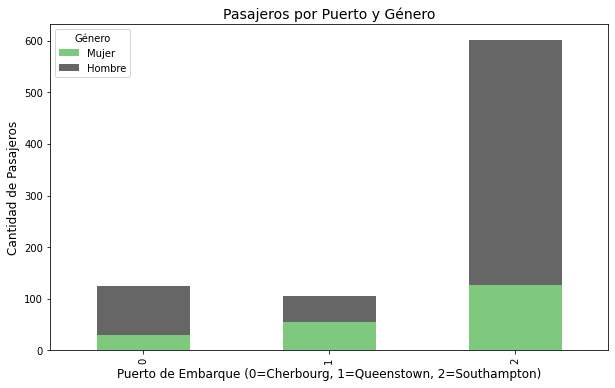

In [31]:
# Gráfica de barras apiladas para pasajeros por puerto y género
pd.crosstab(index=datos['embarked'], columns=datos['sex']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title('Pasajeros por Puerto y Género', fontsize=14)
plt.xlabel('Puerto de Embarque (0=Cherbourg, 1=Queenstown, 2=Southampton)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Género', labels=['Mujer', 'Hombre'])
plt.show()


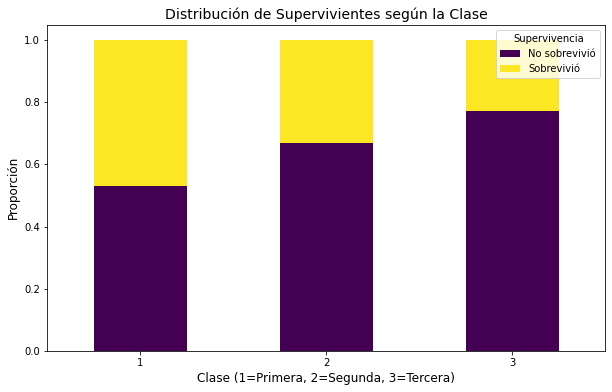

In [33]:
# Crear una tabla cruzada para 'survived' y 'pclass'
crosstab_survived_pclass = pd.crosstab(index=datos['pclass'], columns=datos['survived'], normalize='index')

# Crear una gráfica de barras apiladas para la distribución de supervivientes según la clase
crosstab_survived_pclass.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Configurar títulos y etiquetas
plt.title('Distribución de Supervivientes según la Clase', fontsize=14)
plt.xlabel('Clase (1=Primera, 2=Segunda, 3=Tercera)', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Supervivencia', labels=['No sobrevivió', 'Sobrevivió'])
plt.xticks(rotation=0)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17228\1116034669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='embarked', y='fare', palette='coolwarm')


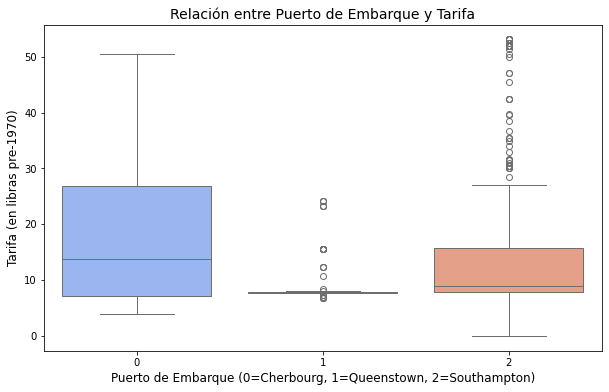

In [35]:
# Gráfica de caja para comparar tarifas por puerto de embarque
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='embarked', y='fare', palette='coolwarm')
plt.title('Relación entre Puerto de Embarque y Tarifa', fontsize=14)
plt.xlabel('Puerto de Embarque (0=Cherbourg, 1=Queenstown, 2=Southampton)', fontsize=12)
plt.ylabel('Tarifa (en libras pre-1970)', fontsize=12)
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17228\2396236618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=datos, x='survived', y='age', palette='muted')


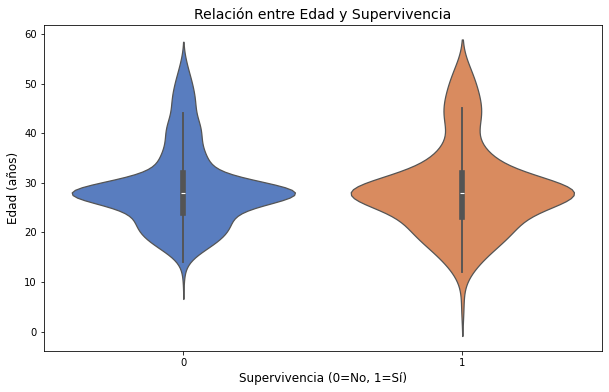

In [37]:
# Gráfica de dispersión para visualizar la relación entre edad y supervivencia
plt.figure(figsize=(10, 6))
sns.violinplot(data=datos, x='survived', y='age', palette='muted')
plt.title('Relación entre Edad y Supervivencia', fontsize=14)
plt.xlabel('Supervivencia (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Edad (años)', fontsize=12)
plt.show()
